In [1]:
import pandas as pd

# Load the dataset
file_path = "Rice_Maize_recommendation.xlsx"  # Ensure the file is in the correct directory
df = pd.read_excel(file_path)

# Display the first few rows
print(df.head())


   Nitrogen\n(mg/kg)  Phosphorus\n(mg/kg)  Potassium\n(mg/kg)  \
0                 58                   81                 162   
1                 58                   81                 162   
2                 38                   54                 108   
3                 39                   54                 109   
4                 38                   54                 108   

   Soil Moisture\n(in %)  Temperature\n(in °C)  Humidity\n(in %)  \
0                   51.0                  27.9              75.9   
1                   51.0                  27.9              73.6   
2                   54.8                  27.9              75.4   
3                   55.6                  27.9              75.2   
4                   54.7                  27.9              75.4   

  Farming_Method Label  
0            WRC  Rice  
1            WRC  Rice  
2           Jhum  Rice  
3           Jhum  Rice  
4           Jhum  Rice  


In [2]:
import pandas as pd

# Load the dataset
file_path = "Rice_Maize_recommendation.xlsx"  
df = pd.read_excel(file_path)

# Clean column names (remove \n)
df.columns = df.columns.str.replace("\n", " ")

# Display the cleaned column names
print(df.head())


   Nitrogen (mg/kg)  Phosphorus (mg/kg)  Potassium (mg/kg)  \
0                58                  81                162   
1                58                  81                162   
2                38                  54                108   
3                39                  54                109   
4                38                  54                108   

   Soil Moisture (in %)  Temperature (in °C)  Humidity (in %) Farming_Method  \
0                  51.0                 27.9             75.9            WRC   
1                  51.0                 27.9             73.6            WRC   
2                  54.8                 27.9             75.4           Jhum   
3                  55.6                 27.9             75.2           Jhum   
4                  54.7                 27.9             75.4           Jhum   

  Label  
0  Rice  
1  Rice  
2  Rice  
3  Rice  
4  Rice  


In [3]:
# Check for missing values
print(df.isnull().sum())


Nitrogen (mg/kg)        0
Phosphorus (mg/kg)      0
Potassium (mg/kg)       0
Soil Moisture (in %)    0
Temperature (in °C)     0
Humidity (in %)         0
Farming_Method          0
Label                   0
dtype: int64


In [4]:
# Check for duplicate rows
print(df.duplicated().sum())


0


In [5]:
# Get summary statistics
print(df.describe())


       Nitrogen (mg/kg)  Phosphorus (mg/kg)  Potassium (mg/kg)  \
count         88.000000           88.000000          88.000000   
mean          51.386364           72.113636         141.340909   
std           13.464668           18.568563          41.526584   
min           10.000000           14.000000          17.000000   
25%           38.750000           54.000000         108.000000   
50%           58.000000           81.000000         162.000000   
75%           59.000000           83.000000         166.000000   
max           64.000000           89.000000         178.000000   

       Soil Moisture (in %)  Temperature (in °C)  Humidity (in %)  
count             88.000000            88.000000        88.000000  
mean              48.955682            27.806818        76.443182  
std               16.598157             0.274928         1.254948  
min                4.000000            27.200000        73.200000  
25%               49.025000            27.775000        75.700000

In [6]:
# Check class distribution
print(df['Label'].value_counts())


Label
Rice     44
Maize    44
Name: count, dtype: int64


In [7]:
# Encode categorical variable
df['Farming_Method'] = df['Farming_Method'].astype('category').cat.codes

# Verify encoding
print(df[['Farming_Method', 'Label']].head())


   Farming_Method Label
0               2  Rice
1               2  Rice
2               0  Rice
3               0  Rice
4               0  Rice


In [8]:
# Encode the Label column
df['Label'] = df['Label'].map({'Rice': 0, 'Maize': 1})

# Verify encoding
print(df[['Farming_Method', 'Label']].head())


   Farming_Method  Label
0               2      0
1               2      0
2               0      0
3               0      0
4               0      0


In [9]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Verify the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (88, 7)
Shape of y: (88,)


In [10]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the shapes of the training and testing sets
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (70, 7) (70,)
Testing set size: (18, 7) (18,)


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Check model accuracy on training data
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.8571428571428571


In [12]:
# Check accuracy on the test data
test_accuracy = model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.3888888888888889


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Reduce overfitting by limiting tree depth
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train again
model.fit(X_train, y_train)

# Test accuracy
test_accuracy = model.score(X_test, y_test)
print("Test Accuracy after tuning:", test_accuracy)


Test Accuracy after tuning: 0.4444444444444444


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Evaluate on test data
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy after tuning:", test_accuracy)


Test Accuracy after tuning: 0.5


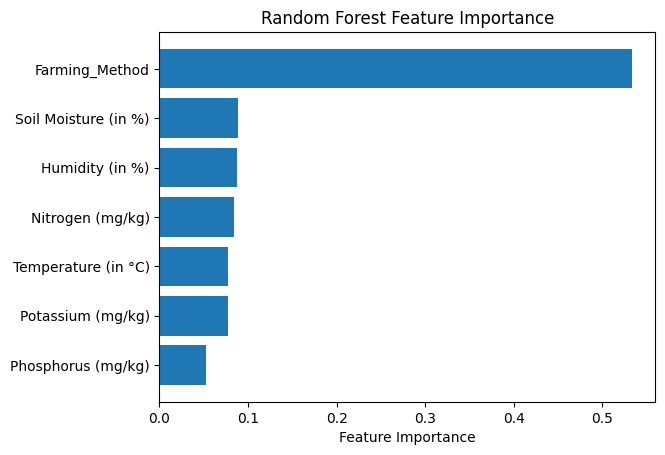

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance
feature_importances = best_model.feature_importances_
feature_names = X.columns

# Sort & plot
sorted_idx = feature_importances.argsort()
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [18]:
new_data = pd.DataFrame({
    "Nitrogen (mg/kg)": [50],
    "Phosphorus (mg/kg)": [60],
    "Potassium (mg/kg)": [140],
    "Soil Moisture (in %)": [45],
    "Temperature (in °C)": [28],
    "Humidity (in %)": [76],
    "Farming_Method": [1]  # Encode it as needed
})
prediction = best_model.predict(new_data)
print("Predicted Crop:", prediction[0])


Predicted Crop: 1


In [19]:
# Map numeric labels back to original crop names
label_mapping = {0: "Rice", 1: "Maize"}  # Adjust based on your encoding

predicted_crop = label_mapping.get(prediction[0], "Unknown")
print("Predicted Crop:", predicted_crop)


Predicted Crop: Maize


In [20]:
sample_data = [[50, 70, 150, 50.0, 27.5, 76.0, 1]]  # Modify values
sample_df = pd.DataFrame(sample_data, columns=X.columns)
prediction = best_model.predict(sample_df)
print("Predicted Crop:", label_mapping.get(prediction[0], "Unknown"))


Predicted Crop: Maize


In [21]:
import joblib
joblib.dump(best_model, "crop_recommendation_model.pkl")


['crop_recommendation_model.pkl']

In [22]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Accuracy: 0.73


In [23]:
model = joblib.load("crop_recommendation_model.pkl")


In [29]:
print(df[['Label']].value_counts())  # Ensure Rice = 0, Maize = 1
print(df[(df['Nitrogen (mg/kg)'] == 58.0) & 
         (df['Phosphorus (mg/kg)'] == 81.0) & 
         (df['Potassium (mg/kg)'] == 162.0) & 
         (df['Soil Moisture (in %)'] == 51.0) & 
         (df['Temperature (in °C)'] == 27.0) & 
         (df['Humidity (in %)'] == 75.0) & 
         (df['Farming_Method'] == 1)])


Label
0        44
1        44
Name: count, dtype: int64
Empty DataFrame
Columns: [Nitrogen (mg/kg), Phosphorus (mg/kg), Potassium (mg/kg), Soil Moisture (in %), Temperature (in °C), Humidity (in %), Farming_Method, Label]
Index: []


In [30]:
df[['Nitrogen (mg/kg)', 'Phosphorus (mg/kg)', 'Potassium (mg/kg)', 
    'Soil Moisture (in %)', 'Temperature (in °C)', 'Humidity (in %)', 
    'Farming_Method', 'Label']].head(10)  # Check sample data


,Nitrogen (mg/kg),Phosphorus (mg/kg),Potassium (mg/kg),Soil Moisture (in %),Temperature (in °C),Humidity (in %),Farming_Method,Label
0,58,81,162,51.0,27.9,75.9,2,0
1,58,81,162,51.0,27.9,73.6,2,0
2,38,54,108,54.8,27.9,75.4,0,0
3,39,54,109,55.6,27.9,75.2,0,0
4,38,54,108,54.7,27.9,75.4,0,0
5,16,33,78,65.0,28.0,75.7,0,0
6,37,52,104,56.1,28.0,77.4,0,0
7,37,52,104,56.0,28.0,76.5,0,0
8,37,52,105,55.5,28.0,76.9,0,0
9,30,40,17,52.1,28.0,77.5,0,0


In [31]:
X = df.drop(columns=['Label', 'Farming_Method'])  # Remove Farming_Method
y = df['Label']


In [32]:
# Encoding Farming_Method
df['Farming_Method'] = df['Farming_Method'].map({'Jhum': 0, 'WRC': 1, 'Terrace': 2})

# Check if encoding is successful
print(df[['Farming_Method']].head())


   Farming_Method
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN


In [34]:
# Convert Farming_Method to string first
df['Farming_Method'] = df['Farming_Method'].astype(str)

# Now clean the values
df['Farming_Method'] = df['Farming_Method'].str.strip().str.capitalize()

# Encode values
df['Farming_Method'] = df['Farming_Method'].map({'Jhum': 0, 'Wrc': 1, 'Terrace': 2})

# Check encoding
print(df[['Farming_Method']].head(10))


   Farming_Method
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN


In [36]:
# Convert column to string first
df['Farming_Method'] = df['Farming_Method'].astype(str)

# Strip spaces and check unique values
df['Farming_Method'] = df['Farming_Method'].str.strip()
print(df['Farming_Method'].unique())  # Check actual unique values
# Standardizing text case
df['Farming_Method'] = df['Farming_Method'].str.capitalize()

# Map known values correctly
df['Farming_Method'] = df['Farming_Method'].map({
    'Jhum': 0, 'Wrc': 1, 'Terrace': 2, 
    'Wet Rice Cultivation': 1,  # If WRC is written differently
    'Jhum Cultivation': 0       # If Jhum is written differently
})

# Check if any unmapped values remain
print(df[df['Farming_Method'].isna()])  # Shows rows where mapping failed



['nan']
    Nitrogen (mg/kg)  Phosphorus (mg/kg)  Potassium (mg/kg)  \
0                 58                  81                162   
1                 58                  81                162   
2                 38                  54                108   
3                 39                  54                109   
4                 38                  54                108   
..               ...                 ...                ...   
83                58                  82                166   
84                58                  82                164   
85                58                  82                164   
86                10                  14                 29   
87                58                  81                162   

    Soil Moisture (in %)  Temperature (in °C)  Humidity (in %)  \
0                   51.0                 27.9             75.9   
1                   51.0                 27.9             73.6   
2                   54.8             

In [37]:
print(df.dtypes)  # Check if Farming_Method is object (string)


Nitrogen (mg/kg)          int64
Phosphorus (mg/kg)        int64
Potassium (mg/kg)         int64
Soil Moisture (in %)    float64
Temperature (in °C)     float64
Humidity (in %)         float64
Farming_Method          float64
Label                     int64
dtype: object


In [38]:
print(df['Farming_Method'].unique())  


[nan]


In [42]:
import pandas as pd

# Load Excel file with correct dtype
df = pd.read_excel("Rice_Maize_recommendation.xlsx", dtype={"Farming_Method": str})

# Print unique values to check for issues
print(df['Farming_Method'].unique())

# Clean the column: strip spaces, standardize capitalization, and remove invalid entries
df['Farming_Method'] = df['Farming_Method'].astype(str).str.strip().str.capitalize()
df['Farming_Method'] = df['Farming_Method'].replace(["nan", "NaN", "None"], pd.NA)

# Check again
print(df['Farming_Method'].unique())


['WRC' 'Jhum' 'Terrace']
['Wrc' 'Jhum' 'Terrace']


In [43]:
# Encoding Farming_Method
df['Farming_Method'] = df['Farming_Method'].map({'Jhum': 0, 'Wrc': 1, 'Terrace': 2})

# Check if encoding is successful
print(df['Farming_Method'].unique())


[1 0 2]


In [50]:
print(df.columns.tolist())  # Print all column names exactly

df.columns = df.columns.str.strip()  # Remove extra spaces

print([repr(col) for col in df.columns])

df = pd.read_excel("Rice_Maize_recommendation.xlsx", sheet_name=0)  # Check sheet name



['Nitrogen\n(mg/kg)', 'Phosphorus\n(mg/kg)', 'Potassium\n(mg/kg)', 'Soil Moisture\n(in %)', 'Temperature\n(in °C)', 'Humidity\n(in %)', 'Farming_Method', 'Label']
["'Nitrogen\\n(mg/kg)'", "'Phosphorus\\n(mg/kg)'", "'Potassium\\n(mg/kg)'", "'Soil Moisture\\n(in %)'", "'Temperature\\n(in °C)'", "'Humidity\\n(in %)'", "'Farming_Method'", "'Label'"]


In [54]:
df.columns = df.columns.str.replace('\n', ' ', regex=True)  # Remove newlines
print(df.columns.tolist())  # Ensure there are no '\n'




['Nitrogen (mg/kg)', 'Phosphorus (mg/kg)', 'Potassium (mg/kg)', 'Soil Moisture (in %)', 'Temperature (in °C)', 'Humidity (in %)', 'Farming_Method', 'Label']


In [55]:
print(df[(df['Nitrogen (mg/kg)'] == 58.0) & 
         (df['Phosphorus (mg/kg)'] == 81.0) & 
         (df['Potassium (mg/kg)'] == 162.0) & 
         (df['Soil Moisture (in %)'] == 51.0) & 
         (df['Temperature (in °C)'] == 27.0) & 
         (df['Humidity (in %)'] == 75.0) & 
         (df['Farming_Method'] == 1)])  # 1 for WRC

Empty DataFrame
Columns: [Nitrogen (mg/kg), Phosphorus (mg/kg), Potassium (mg/kg), Soil Moisture (in %), Temperature (in °C), Humidity (in %), Farming_Method, Label]
Index: []


In [87]:
print("Original Unique Values:", df['Farming_Method'].unique())


Original Unique Values: [-1]


In [89]:
import pandas as pd

# Load your Excel file
file_path = "Rice_Maize_recommendation.xlsx"  # Your file name
df = pd.read_excel(file_path, dtype={'Farming_Method': str})  # Force column as string

# Strip spaces and convert to uppercase for consistency
df['Farming_Method'] = df['Farming_Method'].str.strip().str.upper()

# Replace unwanted values with 'UNKNOWN'
df['Farming_Method'] = df['Farming_Method'].replace({'-1': 'UNKNOWN', 'NAN': 'UNKNOWN', '': 'UNKNOWN'})

print("After Cleaning:", df['Farming_Method'].unique())  # Check values

# Define mapping
mapping = {'WRC': 1, 'SRI': 2, 'JHUM': 3, 'TERRACE': 4, 'UNKNOWN': -1}

# Apply mapping
df['Farming_Method'] = df['Farming_Method'].map(mapping)

print("Final Unique Farming_Method values:", df['Farming_Method'].unique())  # Should show [1, 2, 3, 4, -1]


After Cleaning: ['WRC' 'JHUM' 'TERRACE']
Final Unique Farming_Method values: [1 3 4]


In [90]:
print(df.isnull().sum())


Nitrogen\n(mg/kg)        0
Phosphorus\n(mg/kg)      0
Potassium\n(mg/kg)       0
Soil Moisture\n(in %)    0
Temperature\n(in °C)     0
Humidity\n(in %)         0
Farming_Method           0
Label                    0
dtype: int64


In [93]:
X = df.drop(columns=['Label'])  # Features (drop the target column)
y = df['Label']  # Target variable (Rice/Maize)


In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [98]:
print(df['Label'].value_counts())

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)





Label
Rice     44
Maize    44
Name: count, dtype: int64


In [106]:
print(df['Label'].value_counts())
from imblearn.over_sampling import SMOTE


Label
Rice     44
Maize    44
Name: count, dtype: int64


In [108]:
print(X_train.head())  # Check feature values
print(X_test.head())


    Nitrogen\n(mg/kg)  Phosphorus\n(mg/kg)  Potassium\n(mg/kg)  \
13                 30                   40                  80   
79                 57                   82                  92   
46                 38                   54                 108   
24                 59                   82                 166   
40                 58                   82                 164   

    Soil Moisture\n(in %)  Temperature\n(in °C)  Humidity\n(in %)  \
13                   67.2                  28.1              75.7   
79                   46.8                  27.5              76.6   
46                   54.8                  27.9              75.4   
24                   51.1                  27.9              76.0   
40                   52.5                  27.2              77.9   

    Farming_Method  
13             NaN  
79             NaN  
46             NaN  
24             1.0  
40             1.0  
    Nitrogen\n(mg/kg)  Phosphorus\n(mg/kg)  Potassium\n(mg/kg)

In [109]:
print(y_train.value_counts())
print(y_test.value_counts())


Label
0    35
1    35
Name: count, dtype: int64
Label
0    9
1    9
Name: count, dtype: int64


In [113]:
# ✅ 1. Rename columns (remove newlines)
df.columns = df.columns.str.replace("\n", " ", regex=True)

# ✅ 2. Fill missing values in Farming_Method
df['Farming_Method'] = df['Farming_Method'].fillna(-1).astype(int)

# ✅ 3. Check if there are still missing values
print(df.isnull().sum())  # Should show 0 missing values

# ✅ 4. Check cleaned data
print(df.head())


Nitrogen (mg/kg)        0
Phosphorus (mg/kg)      0
Potassium (mg/kg)       0
Soil Moisture (in %)    0
Temperature (in °C)     0
Humidity (in %)         0
Farming_Method          0
Label                   0
dtype: int64
   Nitrogen (mg/kg)  Phosphorus (mg/kg)  Potassium (mg/kg)  \
0                58                  81                162   
1                58                  81                162   
2                38                  54                108   
3                39                  54                109   
4                38                  54                108   

   Soil Moisture (in %)  Temperature (in °C)  Humidity (in %)  Farming_Method  \
0                  51.0                 27.9             75.9               1   
1                  51.0                 27.9             73.6               1   
2                  54.8                 27.9             75.4              -1   
3                  55.6                 27.9             75.2              -1   
4

In [114]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Target

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shape of datasets
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)


Training Set: (70, 7) (70,)
Testing Set: (18, 7) (18,)


In [117]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define XGBoost model with hyperparameter tuning
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Improved Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


XGBoost Improved Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.50      0.44      0.47         9

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.50        18
weighted avg       0.50      0.50      0.50        18



C:\Users\rajd3\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:44:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost again with scaled data
best_xgb.fit(X_train_scaled, y_train)
y_pred = best_xgb.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("XGBoost (With Scaling) Accuracy:", accuracy)


XGBoost (With Scaling) Accuracy: 0.5


C:\Users\rajd3\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:44:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


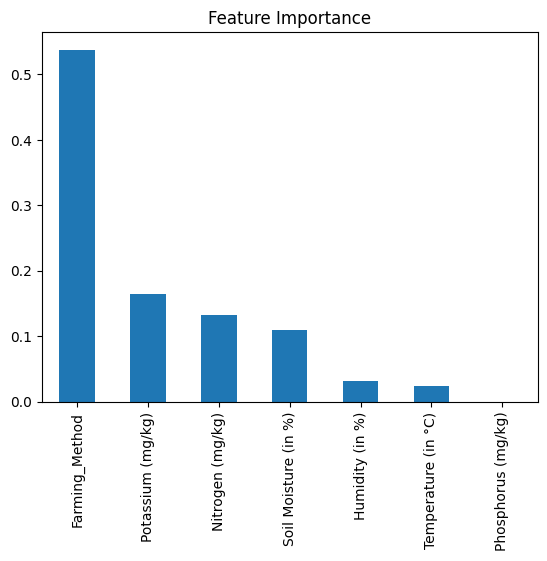

In [119]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance
feature_importance = pd.Series(best_xgb.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.show()


In [120]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

best_xgb.fit(X_train_smote, y_train_smote)
y_pred = best_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("XGBoost (With SMOTE) Accuracy:", accuracy)


XGBoost (With SMOTE) Accuracy: 0.5


C:\Users\rajd3\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:45:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [121]:
from sklearn.utils import shuffle

df = shuffle(df, random_state=42).reset_index(drop=True)


In [122]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 5, 7],          
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]           
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Improved Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Improved Accuracy: 0.5555555555555556


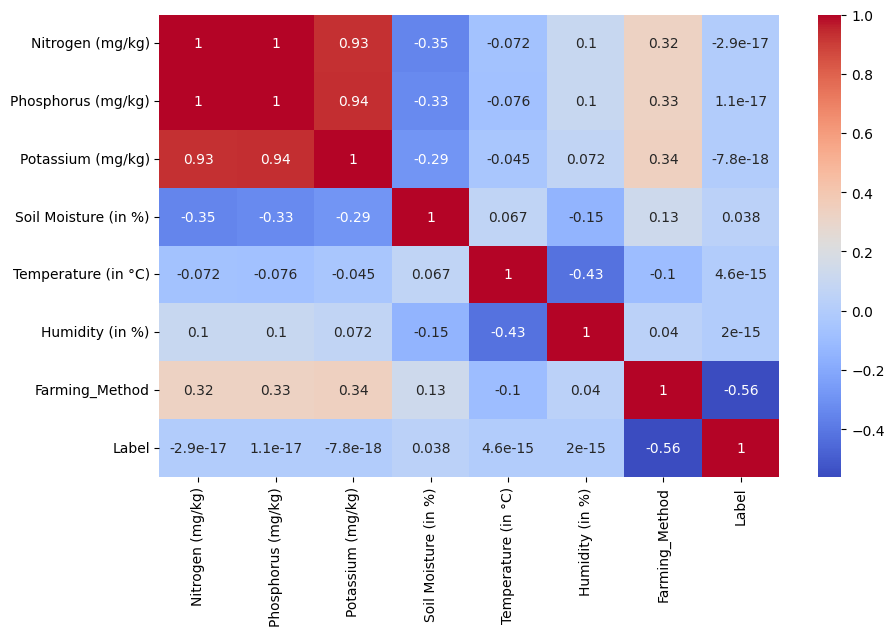

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [125]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 5, 7],          
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]           
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Improved Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Improved Accuracy: 0.5555555555555556


In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [127]:
best_xgb.set_params(n_estimators=75)  # Try increasing to 75
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Updated Accuracy:", accuracy)


Updated Accuracy: 0.5555555555555556


In [128]:
from sklearn.metrics import f1_score
print("F1-score:", f1_score(y_test, y_pred))


F1-score: 0.5555555555555556


In [131]:
import numpy as np

# Define the input features for prediction
test_sample = np.array([[58, 81, 162, 51, 27.9, 75.9, 4]])  # 'Terrace' is mapped to 4

# Predict the crop
predicted_crop = best_xgb.predict(test_sample)

# Map back to crop names
crop_mapping = {0: 'Rice', 1: 'Maize'}
predicted_label = crop_mapping[predicted_crop[0]]

print("Predicted Crop:", predicted_label)


Predicted Crop: Rice
